# **Hierarchical Clustering**

**AIRLINES DATASET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
rawdata=pd.read_csv('/content/EastWestAirlines.csv')

In [4]:
df=rawdata.copy()

In [5]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)
  

In [9]:
df_norm=norm_func(df)

In [10]:
df_norm.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


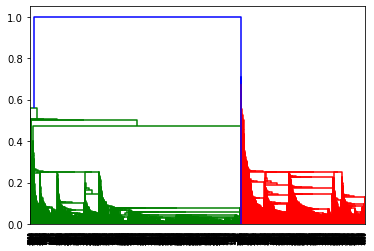

In [11]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

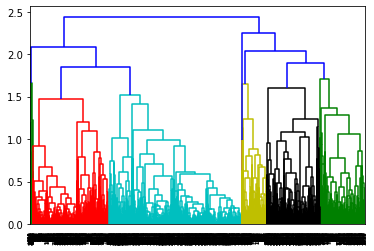

In [12]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

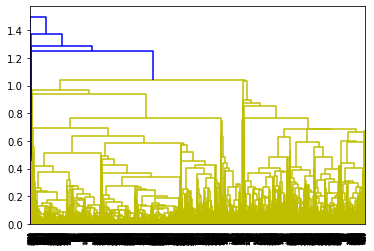

In [13]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [14]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [15]:
y_hc=hc.fit_predict(df_norm)

In [16]:
y_hc

array([1, 1, 1, ..., 0, 1, 1])

In [17]:
df['clusterid']=y_hc

In [18]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [19]:
df.groupby('clusterid').count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid,,,,,,,,,,,,
0,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471
1,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528


## **K-MEANS CLUSTERING**

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

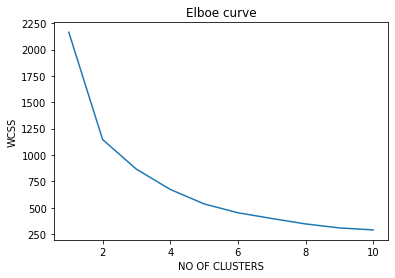

In [21]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elboe curve')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [22]:
model=KMeans(n_clusters=6)
model.fit(df_norm)
model.labels_


array([1, 1, 1, ..., 3, 0, 0], dtype=int32)

In [23]:
md=pd.Series(model.labels_)
df['kClusterid']=md
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid,kClusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,5


In [26]:
df.iloc[:,:].groupby('kClusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
kClusterid,,,,,,,,,,,,,
0,3219.702070,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0,1.000000
1,1169.978009,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0,1.000000
2,1016.656593,100108.744505,335.541209,1.142857,1.027473,1.016484,8805.763736,10.538462,1030.892857,3.206044,5858.197802,1.0,0.019231
3,2984.503171,59882.192389,208.600423,1.896406,1.025370,1.000000,15026.454545,13.023256,833.000000,2.505285,2510.171247,1.0,0.006342
4,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0,1.000000
5,1247.655280,122626.877329,209.512422,4.082298,1.001553,1.032609,50459.795031,20.773292,777.492236,2.326087,5481.400621,1.0,0.000000


In [27]:
k_labels = np.unique(md)
k_labels

array([0, 1, 2, 3, 4, 5], dtype=int32)

# DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
dbs=[]
a=[0.2,0.3,0.5,0.6,0.7,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
for i in a:
  
  dbscan=DBSCAN(eps=i,min_samples=5)
  dbscan.fit(df_norm)
  dbs.append(dbscan.labels_)

In [30]:
dbs_ser=pd.Series(dbs)


In [31]:
dbs_df=pd.DataFrame(dbs_ser)

In [32]:
dbs_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
0,"[0, 0, 0, 0, 1, 0, 2, 3, -1, 4, 5, 6, 5, 0, 0,...","[0, 0, 0, 0, 1, 0, 0, 1, -1, 1, 0, 1, 0, 0, 0,...","[0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
dbs1=[]
dbscan=DBSCAN(eps=2,min_samples=12)
dbscan.fit(df_norm)
dbs1.append(dbscan.labels_)

In [34]:
dbs1

[array([0, 0, 0, ..., 0, 0, 0])]

In [36]:
cl=pd.DataFrame(dbscan.labels_,columns=['dbscluster'])
pd.concat([df,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid,kClusterid,dbscluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,3,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,3,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0
